# Functions that produce visualizations for Risk Category overlaps and contradictions


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_risk_coverage(risk_categories, sections_per_risk):
    """
    Bar chart: total number of sections involving each risk category.

    Parameters
    ----------
    risk_categories : list of str
        Names of risk categories (e.g. ["Credit", "Liquidity", "Operational"]).
    sections_per_risk : list of int or float
        Total number of sections per risk category (same order as risk_categories).

    Returns
    -------
    fig : matplotlib.figure.Figure
    ax : matplotlib.axes.Axes
    """
    x = np.arange(len(risk_categories))

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(x, sections_per_risk)

    ax.set_xticks(x)
    ax.set_xticklabels(risk_categories, rotation=30, ha="right")
    ax.set_ylabel("Number of sections [count]")
    ax.set_xlabel("Risk category")
    ax.set_title("Regulatory coverage by risk category")

    # Make y-axis start at 0, add a small margin
    upper = max(sections_per_risk) if len(sections_per_risk) > 0 else 1
    ax.set_ylim(0, upper * 1.1)

    # Grid for readability
    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)

    # Clean up spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=8
        )

    fig.tight_layout()
    fig.savefig("risk_coverage.png", dpi=300)
    return fig, ax


def plot_overlap_vs_contradiction(risk_categories, overlap_counts, contradiction_counts):
    """
    Grouped bar chart: overlaps vs contradictions per risk category.

    Parameters
    ----------
    risk_categories : list of str
        Names of risk categories.
    overlap_counts : list of int or float
        Number of overlapping sections per risk category.
    contradiction_counts : list of int or float
        Number of contradicting sections per risk category.

    Returns
    -------
    fig : matplotlib.figure.Figure
    ax : matplotlib.axes.Axes
    """
    x = np.arange(len(risk_categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(6, 4))
    bars_overlap = ax.bar(x - width/2, overlap_counts, width, label="Overlapping sections")
    bars_contra = ax.bar(x + width/2, contradiction_counts, width, label="Contradicting sections")

    ax.set_xticks(x)
    ax.set_xticklabels(risk_categories, rotation=30, ha="right")
    ax.set_ylabel("Number of sections [count]")
    ax.set_xlabel("Risk category")
    ax.set_title("Overlapping vs contradicting requirements by risk")

    upper = max(max(overlap_counts), max(contradiction_counts)) if overlap_counts and contradiction_counts else 1
    ax.set_ylim(0, upper * 1.1)

    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend(frameon=False)

    # Add value labels
    for bars in (bars_overlap, bars_contra):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(
                f"{height}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=8
            )

    fig.tight_layout()
    fig.savefig("overlap_vs_contradiction.png", dpi=300)
    return fig, ax


def plot_overlap_contradiction_intensity(risk_categories,
                                         sections_per_risk,
                                         overlap_counts,
                                         contradiction_counts):
    """
    Bar chart of relative intensity: share of sections that are overlapping or contradicting,
    per risk category.

    Parameters
    ----------
    risk_categories : list of str
        Names of risk categories.
    sections_per_risk : list of int or float
        Total number of sections per risk category.
    overlap_counts : list of int or float
        Number of overlapping sections per risk category.
    contradiction_counts : list of int or float
        Number of contradicting sections per risk category.

    Returns
    -------
    fig : matplotlib.figure.Figure
    ax : matplotlib.axes.Axes
    """
    sections_per_risk = np.asarray(sections_per_risk, dtype=float)
    overlap_counts = np.asarray(overlap_counts, dtype=float)
    contradiction_counts = np.asarray(contradiction_counts, dtype=float)

    with np.errstate(divide='ignore', invalid='ignore'):
        overlap_ratio = np.where(sections_per_risk > 0,
                                 overlap_counts / sections_per_risk,
                                 0.0)
        contradiction_ratio = np.where(sections_per_risk > 0,
                                       contradiction_counts / sections_per_risk,
                                       0.0)

    x = np.arange(len(risk_categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(6, 4))
    bars_overlap = ax.bar(x - width/2, overlap_ratio, width, label="Overlap share")
    bars_contra = ax.bar(x + width/2, contradiction_ratio, width, label="Contradiction share")

    ax.set_xticks(x)
    ax.set_xticklabels(risk_categories, rotation=30, ha="right")
    ax.set_ylabel("Share of sections [proportion]")
    ax.set_xlabel("Risk category")
    ax.set_title("Relative intensity of overlaps and contradictions by risk")

    upper = max(overlap_ratio.max(initial=0), contradiction_ratio.max(initial=0))
    ax.set_ylim(0, max(upper * 1.1, 0.1))

    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend(frameon=False)

    # Add percentage labels
    for bars, data in ((bars_overlap, overlap_ratio), (bars_contra, contradiction_ratio)):
        for bar, val in zip(bars, data):
            height = bar.get_height()
            ax.annotate(
                f"{val:.1%}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=8
            )

    fig.tight_layout()
    fig.savefig("intensity.png", dpi=300)
    return fig, ax

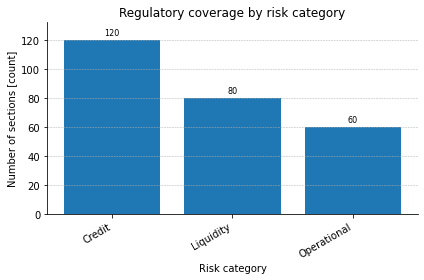

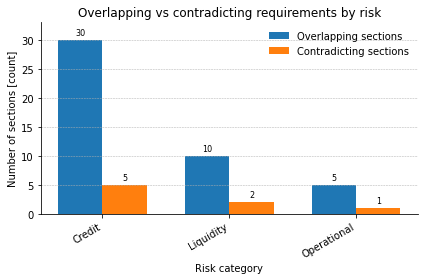

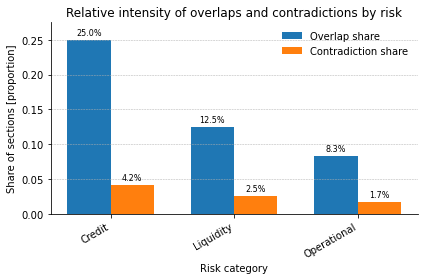

In [8]:
risk_categories = ["Credit", "Liquidity", "Operational"]
sections_per_risk = [120, 80, 60]
overlap_counts = [30, 10, 5]
contradiction_counts = [5, 2, 1]

fig1, ax1 = plot_risk_coverage(risk_categories, sections_per_risk)
fig2, ax2 = plot_overlap_vs_contradiction(risk_categories, overlap_counts, contradiction_counts)
fig3, ax3 = plot_overlap_contradiction_intensity(risk_categories,
                                                 sections_per_risk,
                                                 overlap_counts,
                                                 contradiction_counts)

plt.show()  # or save individual figures with fig.savefig("name.png", dpi=300)


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors


import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors


# --------------------------
# Utility functions
# --------------------------

def _normalize(values, vmin=None, vmax=None):
    arr = np.asarray(values, dtype=float)
    if vmin is None:
        vmin = arr.min()
    if vmax is None:
        vmax = arr.max()
    return (arr - vmin) / (vmax - vmin + 1e-9)


def _pastelize(color, alpha=0.35):
    """
    Blend a color with white to create a pastel tone.
    alpha = 0 → pure white
    alpha = 1 → original color
    Recommended α: 0.25–0.5 for soft pastels.
    """
    r, g, b, a = color
    pastel_r = 1 - alpha * (1 - r)
    pastel_g = 1 - alpha * (1 - g)
    pastel_b = 1 - alpha * (1 - b)
    return (pastel_r, pastel_g, pastel_b, a)


def plot_word_overlap_highlight(
    words,
    similarity_scores,
    title="Word-level contextual similarity (overlap)",
    cmap="Blues",
    vmin=None,
    vmax=None,
    fontsize=12,
    pastel_strength=0.35,   # smaller → lighter pastels
):
    scores = np.asarray(similarity_scores)
    if scores.shape != (len(words),):
        raise ValueError("Scores must match number of words.")

    norm = _normalize(scores, vmin, vmax)
    cmap_obj = plt.get_cmap(cmap)

    fig, ax = plt.subplots(figsize=(max(8, len(words) * 0.6), 2.5))
    ax.set_title(title)

    x = 0.02
    y = 0.5

    for word, val in zip(words, norm):
        base = cmap_obj(val)
        pastel = _pastelize(base, alpha=pastel_strength)   # ← pastel applied here

        ax.text(
            x, y, word + " ",
            fontsize=fontsize,
            ha='left', va='center',
            bbox=dict(
                facecolor=pastel,
                edgecolor="none",
                boxstyle="round,pad=0.25",
            )
        )
        x += (len(word) * 0.015) + 0.03

    ax.axis("off")
    fig.tight_layout()
    return fig, ax

def plot_word_contradiction_highlight(
    words,
    contradiction_scores,
    title="Word-level contextual contradiction",
    cmap="Reds",
    vmin=None,
    vmax=None,
    fontsize=12,
    pastel_strength=0.35,
):
    scores = np.asarray(contradiction_scores)
    if scores.shape != (len(words),):
        raise ValueError("Scores must match number of words.")

    norm = _normalize(scores, vmin, vmax)
    cmap_obj = plt.get_cmap(cmap)

    fig, ax = plt.subplots(figsize=(max(8, len(words) * 0.6), 2.5))
    ax.set_title(title)

    x = 0.02
    y = 0.5

    for word, val in zip(words, norm):
        base = cmap_obj(val)
        pastel = _pastelize(base, alpha=pastel_strength)

        ax.text(
            x, y, word + " ",
            fontsize=fontsize,
            ha='left', va='center',
            bbox=dict(
                facecolor=pastel,
                edgecolor="none",
                boxstyle="round,pad=0.25",
            )
        )
        x += (len(word) * 0.015) + 0.03

    ax.axis("off")
    fig.tight_layout()
    return fig, ax

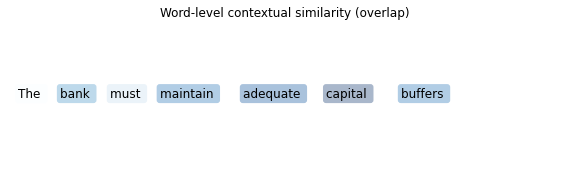

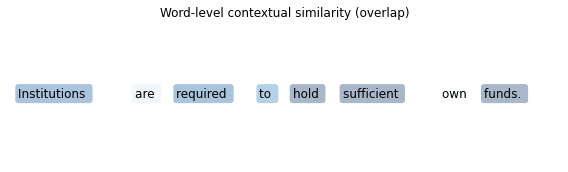

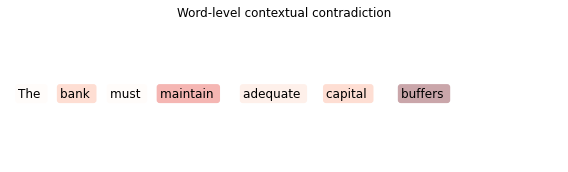

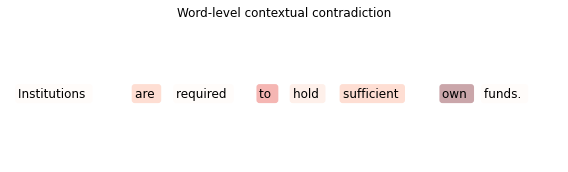

In [32]:

sent2 = "Institutions are required to hold sufficient own funds."

sentence = "The bank must maintain adequate capital buffers"
words = sentence.split()
words2 = sent2.split()

sim_scores = [0.1, 0.6, 0.3, 0.7, 0.8, 0.9, 0.7]
sim_scores2 = [0.8, 0.3, 0.8, 0.7, 0.9, 0.9, 0.2, 0.9]
contra_scores = [0.0, 0.1, 0.0, 0.2, 0.05, 0.1, 0.3]
contra_scores2 = [0.0, 0.1, 0.0, 0.2, 0.05, 0.1, 0.3,0.0]
fig1, _ = plot_word_overlap_highlight(words, sim_scores)
fig11, _ = plot_word_overlap_highlight(words2, sim_scores2)
fig2, _ = plot_word_contradiction_highlight(words, contra_scores)
fig22, _ = plot_word_contradiction_highlight(words2, contra_scores2)

plt.show()